# Measure waveforms

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from qubecalib import QubeCalib
from qubecalib.neopulse import (
    Capture,
    Flushleft,
    RaisedCosFlatTop,
    Rectangle,
    Sequence,
    Series,
)

In [2]:
%matplotlib inline

In [3]:
# load the system settings
qc = QubeCalib("./system_settings.json")

## Capture noise

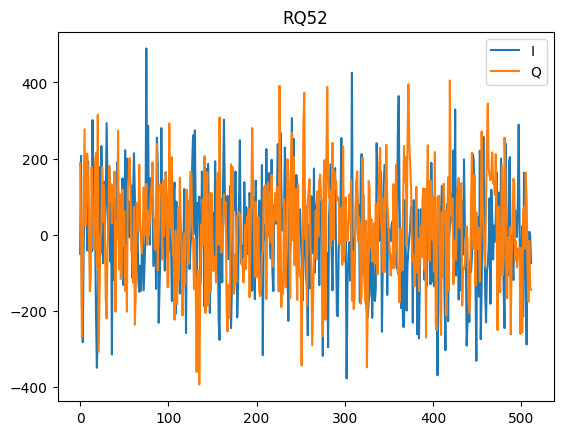

In [4]:
with Sequence() as seq:
    Capture(duration=1024).target("RQ52")

qc.add_sequence(seq)

for status, data, config in qc.step_execute(
    repeats=1,
    dsp_demodulation=False,
):
    for target, iqs in data.items():
        iq = iqs[0]
        plt.plot(np.real(iq), label="I")
        plt.plot(np.imag(iq), label="Q")
        plt.title(target)
        plt.legend()
        plt.show()

## Capture reflected waveforms

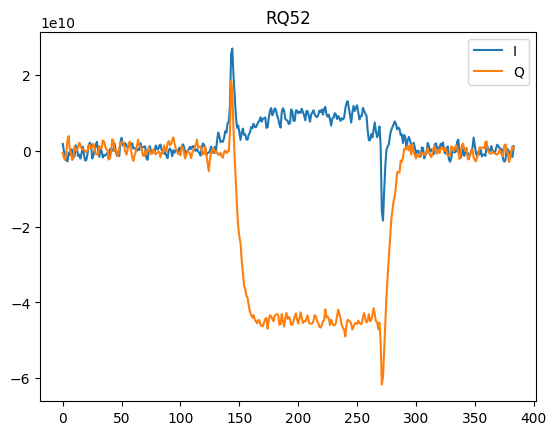

In [5]:
pulse = Rectangle(duration=1024, amplitude=0.1)
capture = Capture(duration=3 * 1024)

with Sequence() as seq:
    with Flushleft():
        pulse.target("RQ52")
        capture.target("RQ52")

qc.add_sequence(seq)

for status, data, config in qc.step_execute(
    repeats=3000,
    interval=150 * 1024,
):
    for target, iqs in data.items():
        iq = iqs[0]
        plt.plot(np.real(iq), label="I")
        plt.plot(np.imag(iq), label="Q")
        plt.title(target)
        plt.legend()
        plt.show()

### Multiplexed

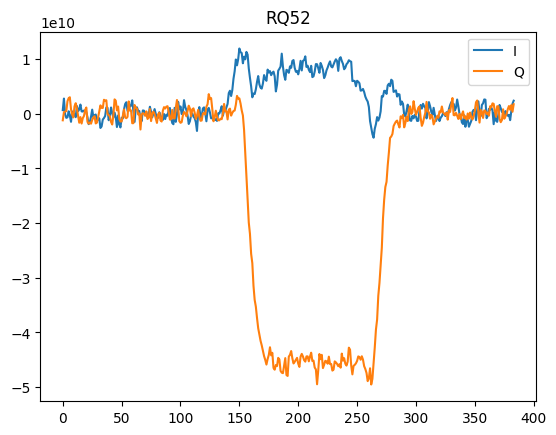

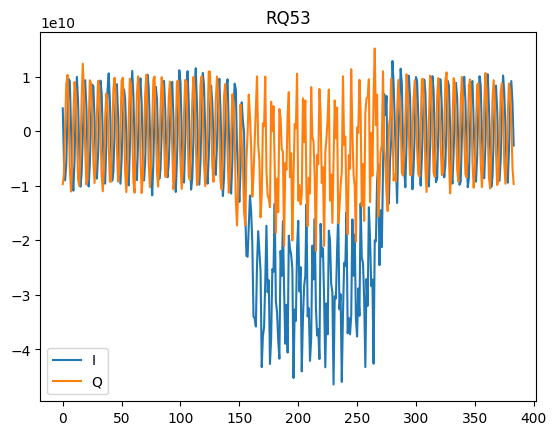

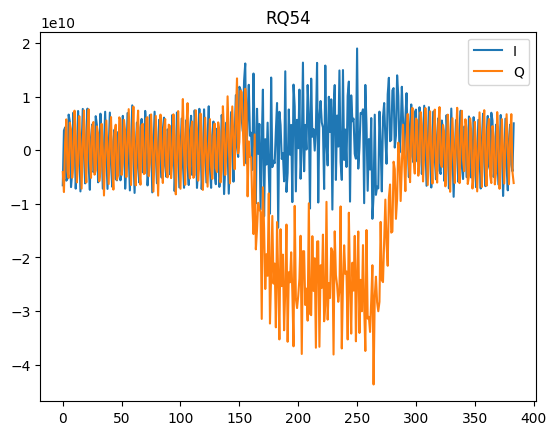

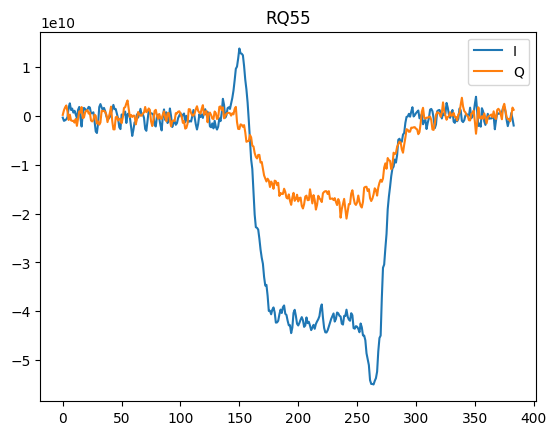

In [6]:
pulse = RaisedCosFlatTop(duration=1024, amplitude=0.1, rise_time=128)
capture = Capture(duration=3 * 1024)

with Sequence() as seq:
    with Flushleft():
        pulse.target("RQ52", "RQ53", "RQ54", "RQ55")
        capture.target("RQ52", "RQ53", "RQ54", "RQ55")

qc.add_sequence(seq)

for status, data, config in qc.step_execute(
    repeats=3000,
    interval=150 * 1024,
):
    for target, iqs in data.items():
        iq = iqs[0]
        plt.plot(np.real(iq), label="I")
        plt.plot(np.imag(iq), label="Q")
        plt.title(target)
        plt.legend()
        plt.show()

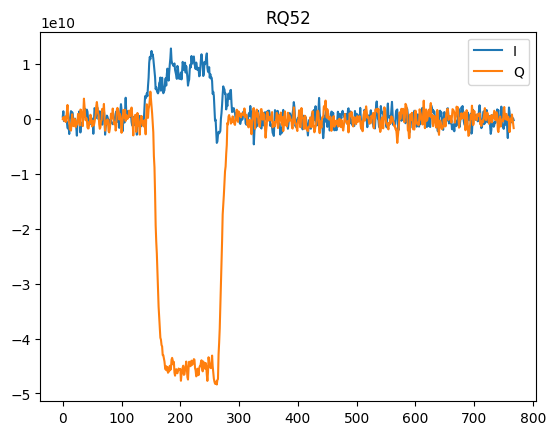

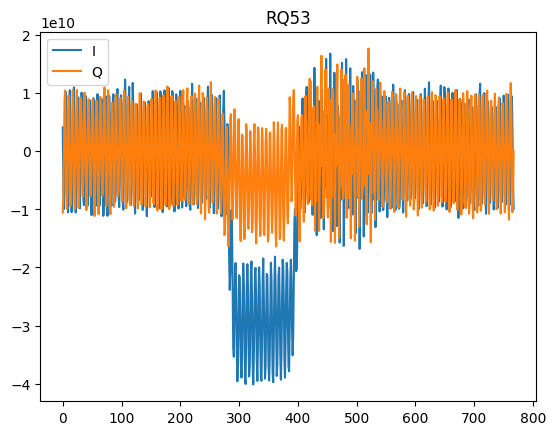

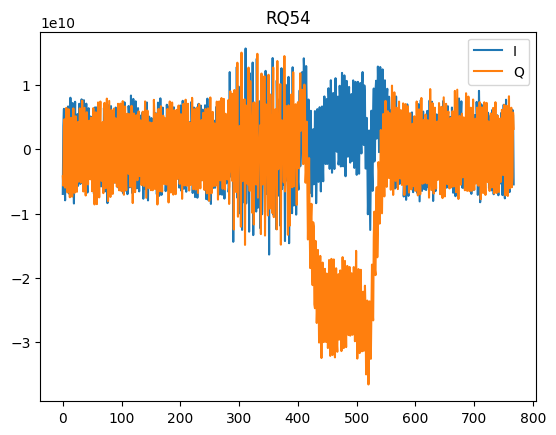

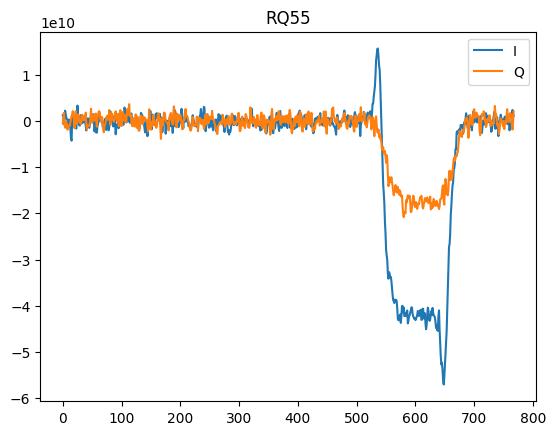

In [7]:
pulse = RaisedCosFlatTop(duration=1024, amplitude=0.1, rise_time=128)
capture = Capture(duration=6 * 1024)

with Sequence() as seq:
    with Flushleft():
        with Series():
            pulse.target("RQ52")
            pulse.target("RQ53")
            pulse.target("RQ54")
            pulse.target("RQ55")
        capture.target("RQ52", "RQ53", "RQ54", "RQ55")

qc.add_sequence(seq)

for status, data, config in qc.step_execute(
    repeats=3000,
    interval=150 * 1024,
):
    for target, iqs in data.items():
        iq = iqs[0]
        plt.plot(np.real(iq), label="I")
        plt.plot(np.imag(iq), label="Q")
        plt.title(target)
        plt.legend()
        plt.show()